# Construção do A* e modelo de heurística

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Definir os movimentos possíveis do cavalo
movimentos_cavalo = [
    (-2, -1), (-2, 1), (2, -1), (2, 1),
    (-1, -2), (-1, 2), (1, -2), (1, 2)
]

# Função de heurística (distância de Manhattan entre a posição atual e o objetivo)
def heuristica(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

# A* para encontrar o caminho do cavalo
def a_star(start, goal, movimentos_cavalo):
    open_list = []
    closed_list = set()
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristica(start, goal)}
    heapq.heappush(open_list, (f_score[start], start))

    while open_list:
        _, current = heapq.heappop(open_list)

        # Se chegamos ao objetivo, reconstruímos o caminho
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        closed_list.add(current)

        # Para cada movimento válido do cavalo
        for dx, dy in movimentos_cavalo:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < 8 and 0 <= neighbor[1] < 8 and neighbor not in closed_list:
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristica(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return []

# Construção do cenário de xadrez

In [2]:
# Função para desenhar o tabuleiro com o caminho
def desenhar_tabuleiro(caminho, start, goal):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Criar padrão de tabuleiro 8x8
    tabuleiro = np.zeros((8, 8))
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                tabuleiro[i, j] = 1

    ax.imshow(tabuleiro, cmap="gray", origin="lower")

    # Marcadores do caminho
    xs = [p[1] for p in caminho]
    ys = [p[0] for p in caminho]

    # Desenhar caminho com linhas
    ax.plot(xs, ys, color="red", linewidth=2, marker="o", markersize=10)

    # Destacar início e fim
    ax.scatter(start[1], start[0], color="green", s=200, label="Início")
    ax.scatter(goal[1], goal[0], color="blue", s=200, label="Objetivo")

    # Rotular casas (A1-H8)
    col_labels = ["A","B","C","D","E","F","G","H"]
    for i in range(8):
        ax.text(i, -0.4, col_labels[i], ha="center", fontsize=12)
        ax.text(-0.4, i, str(i+1), va="center", fontsize=12)

    # Ajustes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Caminho do Cavalo no Tabuleiro de Xadrez")
    ax.legend(loc="upper right")
    plt.show()

# Finalização com a aplicação do A* e o plot da simulação

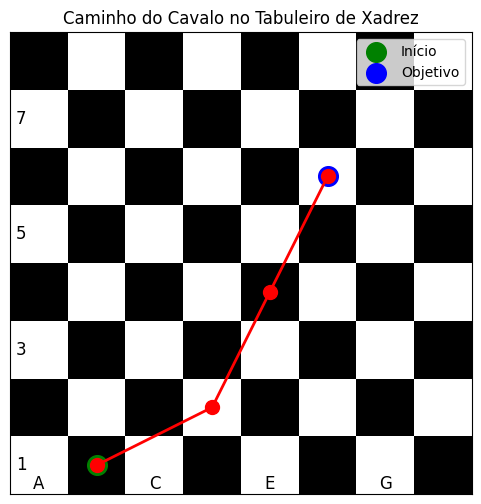

Cenário simulado: [(0, 1), (1, 3), (3, 4), (5, 5)]


In [3]:
# Definir posição inicial do cavalo e do rei
inicio = (0, 1)  # Início do cavalo em A1
obj = (5, 5)  # Objetivo do cavalo em H8

# Buscar o caminho do cavalo usando A*
cenário = a_star(inicio, obj, movimentos_cavalo)

# Mostrar o tabuleiro com o caminho
if cenário:
    desenhar_tabuleiro(cenário, inicio, obj)
    print(f'Cenário simulado: {cenário}')
else:
    print("Não foi possível encontrar um cenário válido.")